

Mobility Patterns Analysis in Cambridge
-------------------------------


## 1. Data Importing

#### 1.1. Gowalla Users in Cambridge

On Gowalla, users were able to check in at different locations across the course of the day.

 is a subset of Gowalla users located in Cambridge, UK from the Stanford University,
Stanford Network Analysis Project. The data has been anonymised (personal identifier removed). However, you could still
trace the location of particular individuals, according to their check-in locations.
For further information, the entire dataset is available at https://snap.stanford.edu/data/loc-gowalla.html

The variables contained in the dataset (which should be self-explanatory), provided in the `Cambridge_gowalla.csv` file, are:

* `User_ID`, or the unique identifier of the user, e.g. 196514
* `check-in-date`, e.g. 2010-07-24
* `check-in-time`, e.g. 13:45:06
* `latitude`, e.g. 53.3648119
* `longitude`, e.g. -2.2723465833
* `loc_id`, or the unique identifier of the location, e.g. 145064

In [7]:
#importing necessary packages for this project

##data managament

import numpy as np #for numeric calculations with more complex data structures
import pandas as pd #for data importing, wrangling and cleaning

##data visualisation

import matplotlib.pyplot as plt #for plots and data visualisation
import seaborn as sns #for plots and data visualisation
import geopandas as gpd #for geospatial data management and mapping
import contextily as ctx #for retrieving basemaps from the internet


import osmnx as ox # this line imports osmnx
import networkx as nx # this line imports networkx
import matplotlib.cm as cm
import matplotlib.colors as colors


from folium import FeatureGroup, LayerControl, Map, Marker
#from folium.plugins import HeatMap

# Import Map, Marker, Icon, Polyline from "folium" library. 
from folium import Map, Marker, Icon, PolyLine

##ignore warnings

import warnings
warnings.filterwarnings(action='ignore')

In [8]:
#importing the postcode coordinates

gowalla_df = pd.read_csv("Data/Cambridge_gowalla.csv")

gowalla_df.head()


,ID,User_ID,date,Time,lon,lat,loc_ID
0,1,382,12/09/2010,08:46:10,0.102380,52.173123,1307095
1,2,1050,14/08/2010,07:34:30,0.123451,52.197975,1735486
2,3,1050,14/08/2010,07:31:37,0.122774,52.197910,654162
3,4,1050,13/08/2010,21:07:46,0.116429,52.210057,516769
4,5,1050,13/08/2010,21:07:38,0.116200,52.210010,21381


In [9]:
#summary stat

gowalla_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1871.0,936.000000,540.255495,1.000000,468.500000,936.000000,1403.500000,1.871000e+03
User_ID,1871.0,67308.761625,48441.304727,382.000000,26997.000000,57191.000000,102829.000000,1.949260e+05
lon,1871.0,0.126569,0.019231,0.053656,0.118081,0.123349,0.137495,1.989295e-01
lat,1871.0,52.205758,0.013197,52.156783,52.199366,52.204436,52.209822,5.226345e+01
loc_ID,1871.0,551385.897916,824764.953024,21355.000000,52595.000000,311727.000000,620918.500000,5.705820e+06


In [10]:
#how many users?
grp = gowalla_df.groupby(["User_ID"])["lon"].sum()

grp

User_ID
382       0.102380
1050      0.600213
1773      0.378482
1876      0.559966
2208      0.300961
            ...   
188884    0.134210
190023    4.692435
192442    0.127612
192840    0.260844
194926    0.242717
Name: lon, Length: 191, dtype: float64

#### 1.2. Creating shopping mall data from addresses

In [11]:
from geopandas.tools import geocode


# Define a list of addresses
addresses = ["St Andrew's St, Cambridge CB2 3BJ",
             'Coldhams Ln, Cambridge CB1 3ET',
             'Newmarket Rd, Cambridge CB5 8WR',
            "St Tibb's Row, Cambridge CB2 3ET",
            "46 Grafton Centre, Cambridge CB1 1PS"]

# Geocode the addresses to get their geographic coordinates
malls = geocode(addresses, provider='nominatim', user_agent='myapp')

malls = malls.to_crs(27700)

malls.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

## 2. Data Wrangling and Exploration

### 2.1. Converting csv into geospatial data

In [12]:
#convert csv into gdf using lat and long

gowalla_gdf = gpd.GeoDataFrame(
    gowalla_df, 
    geometry=gpd.points_from_xy(gowalla_df.lon, 
                                      gowalla_df.lat)).set_crs(epsg=4326)

gowalla_gdf = gowalla_gdf.to_crs("EPSG:27700")
gowalla_gdf.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

### 2.2. Mapping all check-in point of 191 Users

In [ ]:
#mapping individual check-in locations with users

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')

#check-in point of 191 users

gowalla_gdf.plot(ax=ax,marker='o',markersize=28,legend=True)


#basemap
ctx.add_basemap(ax, alpha=0.6, crs = 'EPSG:27700', source=ctx.providers.Esri.WorldStreetMap)

#the title
ax.set_title("Individual Check-in Locations",fontsize= 24)


#remove the axis

ax.set_axis_off()

### 2.3. Choosing Two Users: User 75027 and User 102829

In [14]:
#filtering only two users

filter = (gowalla_gdf["User_ID"]==75027) | (gowalla_gdf["User_ID"]==102829)
                      
gowalla_gdf_users = gowalla_gdf[filter == True]

gowalla_gdf_users["user_str"] = "User " + gowalla_gdf_users["User_ID"].astype(str)

gowalla_gdf_users

### 2.4. Visualise individual check-in locations: User 75027 and 102829

In [ ]:
#mapping two users in different colors

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')


gowalla_gdf_users.plot(ax=ax, column = "user_str", cmap="RdYlBu",marker='o', markersize=68,legend=True,legend_kwds={'title': 'Users', 'title_fontsize': 20,'fontsize': 19})

#basemap

ctx.add_basemap(ax, alpha=0.6, crs = 'EPSG:27700', source=ctx.providers.Esri.WorldStreetMap)

#the title
ax.set_title("Individual Check-in Locations",fontsize= 24)

#legend posiition

ax.get_legend().set_bbox_to_anchor((0.40, 0.20))


#remove the axis

ax.set_axis_off()

#save the map

file_path = "checkin_map"

plt.savefig(file_path, dpi=300, bbox_inches='tight')

### 2.5. Choosing specific dates for two users

In [ ]:
#filter single dates for each user

filter_75027 = (gowalla_gdf["User_ID"]==75027) & (gowalla_gdf["date"]=="30/01/2010")

filter_102829 = (gowalla_gdf["User_ID"]==102829) & (gowalla_gdf["date"]=="24/05/2010")

filter_twousers = ((gowalla_gdf["User_ID"]==75027) & (gowalla_gdf["date"]=="30/01/2010")) | ((gowalla_gdf["User_ID"]==102829) & (gowalla_gdf["date"]=="24/05/2010"))

#create new df containing user check-in in a specific date to calculate shortest path

gowalla_gdf_75027 = gowalla_gdf[filter_75027 == True]

gowalla_gdf_102829 = gowalla_gdf[filter_102829 == True]

gowalla_gdf_twousers = gowalla_gdf[filter_twousers == True]



In [ ]:
#look the df for the user 75027

gowalla_gdf_75027

,ID,User_ID,date,Time,lon,lat,loc_ID,geometry
1219,1220,75027,30/01/2010,22:14:11,0.123643,52.202858,473651,POINT (545222.319 258195.056)
1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328,POINT (545506.261 257768.949)
1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196,POINT (546614.370 259178.477)
1222,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331,POINT (546645.154 258974.816)
1223,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382,POINT (546767.565 259015.719)
1224,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191,POINT (546660.514 258548.236)
1225,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133,POINT (546641.226 258497.530)
1226,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968,POINT (546716.237 258468.954)
1227,1228,75027,30/01/2010,15:13:43,0.173005,52.157223,477840,POINT (548747.314 253220.021)


In [18]:
#look the df for the user 102829


gowalla_gdf_102829

,ID,User_ID,date,Time,lon,lat,loc_ID,geometry
1368,1369,102829,24/05/2010,20:34:44,0.110121,52.196113,1024097,POINT (544320.150 257417.928)
1369,1370,102829,24/05/2010,18:46:53,0.118662,52.208558,21375,POINT (544863.405 258819.019)
1370,1371,102829,24/05/2010,17:49:04,0.117664,52.210026,558662,POINT (544790.483 258980.287)
1371,1372,102829,24/05/2010,17:33:12,0.117766,52.203666,21357,POINT (544818.105 258273.204)
1372,1373,102829,24/05/2010,17:16:12,0.114811,52.194001,1166464,POINT (544647.518 257192.406)
1373,1374,102829,24/05/2010,14:20:06,0.094001,52.212543,373983,POINT (543165.703 259213.205)
1374,1375,102829,24/05/2010,12:14:26,0.090578,52.209531,536286,POINT (542941.531 258871.545)
1375,1376,102829,24/05/2010,10:58:54,0.137495,52.194409,21356,POINT (546196.506 257283.281)


### 2.6. Mapping the only one user with time

In [ ]:
#mapping check-in locations for user 75027

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')

# this adds the basemap

gowalla_gdf_75027.plot(ax=ax,marker='o',cmap="Blues",markersize=75,legend=True, column = "Time")

ctx.add_basemap(ax,crs = 'EPSG:27700', alpha=0.6, source=ctx.providers.Esri.WorldStreetMap)


# this sets the title
ax.set_title("Check-in Locations for the user 75027",fontsize= 20)

# this removes the axis
ax.set_axis_off()

## 3. Provide Characterisation of the Gowalla dataset

### 3.1. User 75027 Driving Path

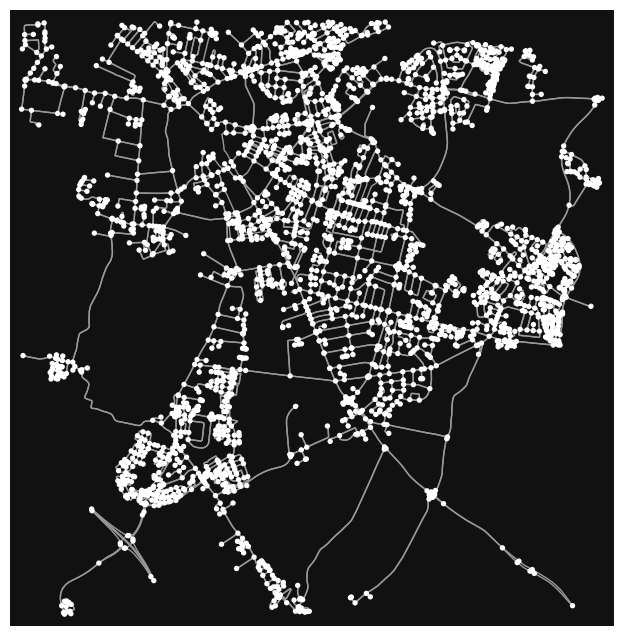

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [20]:
#define a location for retrieving network from OSM

location = (52.185996044397264, 0.13785177897856635)

#create a graph within driving distance

graph=ox.graph_from_point(location ,dist=3800,network_type='drive')

#plot the network graph

ox.plot_graph(graph)


In [21]:
#sorting the dataset according to time within the day

gowalla_gdf_75027_sorted = gowalla_gdf_75027.sort_values(by=['Time'], ascending=True).reset_index()

gowalla_gdf_75027_sorted

,index,ID,User_ID,date,Time,lon,lat,loc_ID,geometry
0,1227,1228,75027,30/01/2010,15:13:43,0.173005,52.157223,477840,POINT (548747.314 253220.021)
1,1226,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968,POINT (546716.237 258468.954)
2,1225,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133,POINT (546641.226 258497.530)
3,1224,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191,POINT (546660.514 258548.236)
4,1223,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382,POINT (546767.565 259015.719)
5,1222,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331,POINT (546645.154 258974.816)
6,1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196,POINT (546614.370 259178.477)
7,1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328,POINT (545506.261 257768.949)
8,1219,1220,75027,30/01/2010,22:14:11,0.123643,52.202858,473651,POINT (545222.319 258195.056)


In [22]:
#trying to create a three consecutive path with lists

lst0 = []
lst0.append(gowalla_gdf_75027_sorted.loc[0]["lat"].item())
lst0.append(gowalla_gdf_75027_sorted.loc[0]["lon"].item())



lst1 = []
lst1.append(gowalla_gdf_75027_sorted.loc[1]["lat"].item())
lst1.append(gowalla_gdf_75027_sorted.loc[1]["lon"].item())

lst2 = []
lst2.append(gowalla_gdf_75027_sorted.loc[2]["lat"].item())
lst2.append(gowalla_gdf_75027_sorted.loc[2]["lon"].item())

lst3 = []
lst3.append(gowalla_gdf_75027_sorted.loc[3]["lat"].item())
lst3.append(gowalla_gdf_75027_sorted.loc[3]["lon"].item())



[1513021086, 98936372, 2580731394, 18650273, 18650274, 2179905293, 705448024, 526297006, 1572499284, 16713913, 19851346, 20826574, 20826570, 20826563, 527446635, 1480048755, 20826576, 20826577, 19851527, 14913698, 20826601, 20826606]


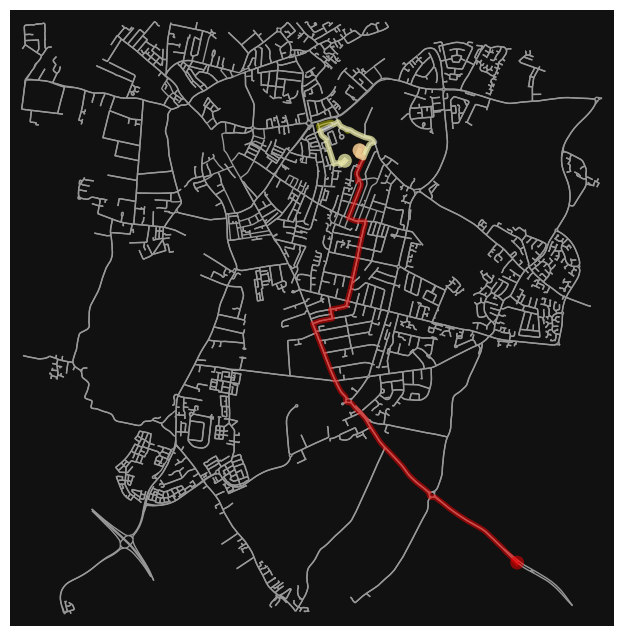

In [23]:
# define origin/desination points then get the nodes nearest to each
origin_point = lst0
destination_point = lst1
origin_node=ox.distance.nearest_nodes(graph, X=origin_point[1],Y=origin_point[0])
destination_node = ox.distance.nearest_nodes(graph, X=destination_point[1],Y=destination_point[0])

# find the shortest path between origin and destination nodes
route = nx.shortest_path(graph, origin_node, destination_node, weight='length')

origin_point1 = lst1
destination_point1 = lst2
origin_node1=ox.distance.nearest_nodes(graph, X=origin_point1[1],Y=origin_point1[0])
destination_node1 = ox.distance.nearest_nodes(graph, X=destination_point1[1],Y=destination_point1[0])
route1 = nx.shortest_path(graph, origin_node1, destination_node1, weight='length')
print(route1)

origin_point2 = lst2
destination_point2 = lst3
origin_node2=ox.distance.nearest_nodes(graph, X=origin_point2[1],Y=origin_point2[0])
destination_node2 = ox.distance.nearest_nodes(graph, X=destination_point2[1],Y=destination_point2[0])
route2 = nx.shortest_path(graph, origin_node2, destination_node2, weight='length')



# plot the route showing origin/destination lat-long points in blue


#the code below is taken from https://stackoverflow.com/questions/51258029/plotting-multiple-routes-with-osmnx

routes = [route, route1,route2]
rc = ['r', 'y',"w"]
fig, ax = ox.plot_graph_routes(graph, routes, route_colors=rc, route_linewidth=6, node_size=0)





#### 3.1.2. Shortest Driving Path for User 75027

The some of the code below is retrived from https://towardsdatascience.com/shortest-path-algorithm-used-in-osm-street-network-33e0f864f34b

In [24]:
#create an empty list

routes = []
distances_75027 = []

# iterate for each consecutive point

for index, row in gowalla_gdf_75027_sorted.iterrows():
     if index != len(gowalla_gdf_75027_sorted) - 1:
            
        # find origin node
        
        origin_node = ox.distance.nearest_nodes(graph, X=gowalla_gdf_75027_sorted.loc[index, 'lon'], Y=gowalla_gdf_75027_sorted.loc[index, 'lat'])
        #find destination node
        
        destination_node = ox.distance.nearest_nodes(graph, X=gowalla_gdf_75027_sorted.loc[index+1, 'lon'], Y=gowalla_gdf_75027_sorted.loc[index+1, 'lat'])
        
        #calculate the shortest path
        route = nx.shortest_path(graph, origin_node, destination_node, weight='length')
        
        #append all routes into one
        
        routes.append(route)
        
        #calculate each route length
        
        route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, route, 'length'))
        distances_75027.append(route_length)

# print the calculated route length and distance
        print(f"Route length {index} to {index+1}: {route_length:.2f} meters")


Route length 0 to 1: 7078.22 meters
Route length 1 to 2: 1909.05 meters
Route length 2 to 3: 1833.50 meters
Route length 3 to 4: 1373.38 meters
Route length 4 to 5: 303.18 meters
Route length 5 to 6: 402.35 meters
Route length 6 to 7: 2025.00 meters
Route length 7 to 8: 1069.02 meters


In [25]:
#look at the data containing distances of routes
distances_75027

[7078.2210000000005,
 1909.0470000000003,
 1833.4969999999998,
 1373.382,
 303.175,
 402.351,
 2025.003,
 1069.022]

In [29]:
#find statistics of shortest routes
sum_75027 = sum(distances_75027)
average_75027 = sum(distances_75027) / len(distances_75027)
max_75027 = max(distances_75027)
print(sum_75027)
print(average_75027)
print(max_75027)

15993.698
1999.21225
7078.2210000000005


#### 3.1.2. Plotting the Routes for the User 75027

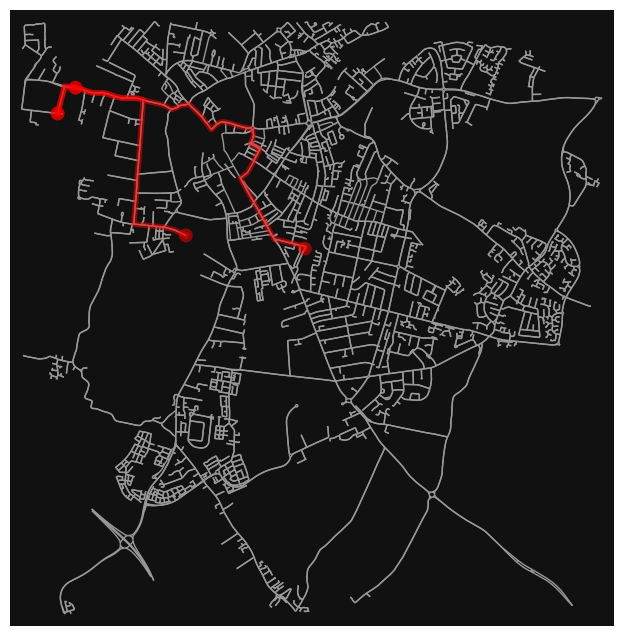

In [357]:
#plotting the shortest routes between each consecutive point 

fig, ax = ox.plot_graph_routes(graph, routes,route_linewidth=6, node_size=0)


### 3.2.  User 102829 Driving Path

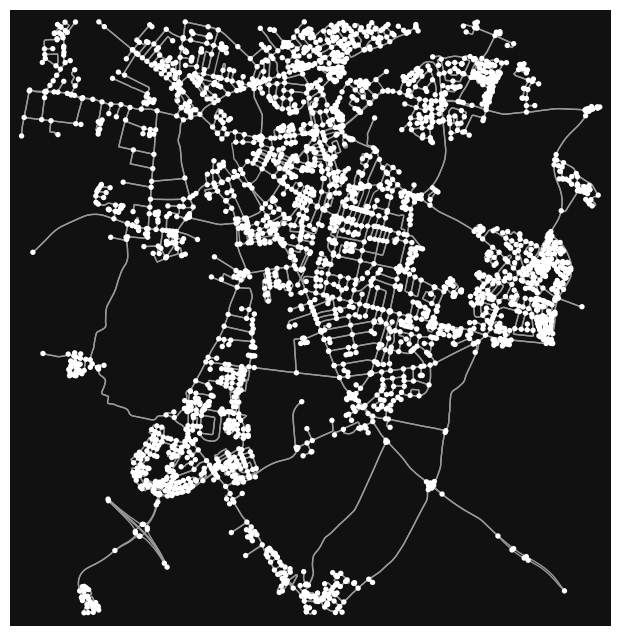

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [30]:
#define a location in Cambridge

location2 = (52.211200794026105, 0.10669306598256363)

#create a network graph with driving distance

graph2=ox.graph_from_point(location ,dist=4000,network_type='drive')

#plot the network graph

ox.plot_graph(graph2)


In [31]:
#sorting the df according to the time

gowalla_gdf_102829_sorted = gowalla_gdf_102829.sort_values(by=['Time'], ascending=True).reset_index()

gowalla_gdf_102829_sorted

,index,ID,User_ID,date,Time,lon,lat,loc_ID,geometry
0,1375,1376,102829,24/05/2010,10:58:54,0.137495,52.194409,21356,POINT (546196.506 257283.281)
1,1374,1375,102829,24/05/2010,12:14:26,0.090578,52.209531,536286,POINT (542941.531 258871.545)
2,1373,1374,102829,24/05/2010,14:20:06,0.094001,52.212543,373983,POINT (543165.703 259213.205)
3,1372,1373,102829,24/05/2010,17:16:12,0.114811,52.194001,1166464,POINT (544647.518 257192.406)
4,1371,1372,102829,24/05/2010,17:33:12,0.117766,52.203666,21357,POINT (544818.105 258273.204)
5,1370,1371,102829,24/05/2010,17:49:04,0.117664,52.210026,558662,POINT (544790.483 258980.287)
6,1369,1370,102829,24/05/2010,18:46:53,0.118662,52.208558,21375,POINT (544863.405 258819.019)
7,1368,1369,102829,24/05/2010,20:34:44,0.110121,52.196113,1024097,POINT (544320.150 257417.928)


In [32]:
#trying to calculate three shortest routes with list

lst0 = []
lst0.append(gowalla_gdf_102829_sorted.loc[0]["lat"].item())
lst0.append(gowalla_gdf_102829_sorted.loc[0]["lon"].item())



lst1 = []
lst1.append(gowalla_gdf_102829_sorted.loc[1]["lat"].item())
lst1.append(gowalla_gdf_102829_sorted.loc[1]["lon"].item())

lst2 = []
lst2.append(gowalla_gdf_102829_sorted.loc[2]["lat"].item())
lst2.append(gowalla_gdf_102829_sorted.loc[2]["lon"].item())

lst3 = []
lst3.append(gowalla_gdf_102829_sorted.loc[3]["lat"].item())
lst3.append(gowalla_gdf_102829_sorted.loc[3]["lon"].item())



[24654319, 104585, 1489153098, 1489153055, 104584]


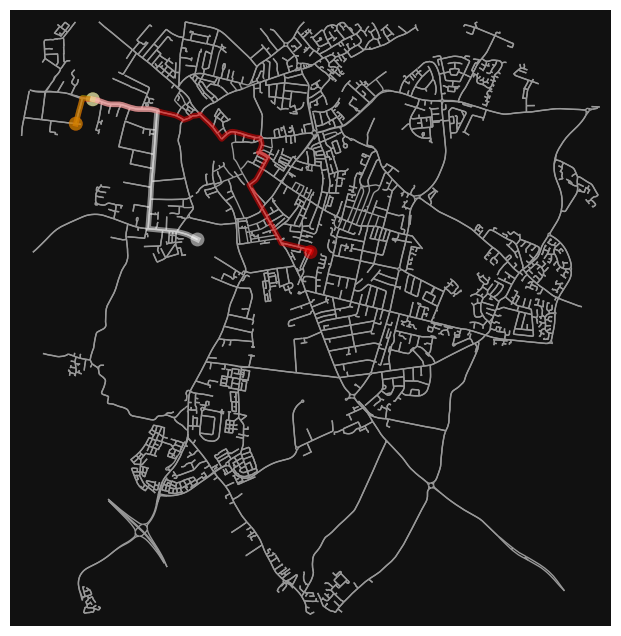

In [33]:
# define origin/desination points then get the nodes nearest to each
origin_point = lst0
destination_point = lst1
origin_node=ox.distance.nearest_nodes(graph2, X=origin_point[1],Y=origin_point[0])
destination_node = ox.distance.nearest_nodes(graph2, X=destination_point[1],Y=destination_point[0])

# find the shortest path between origin and destination nodes
route = nx.shortest_path(graph2, origin_node, destination_node, weight='length')

origin_point1 = lst1
destination_point1 = lst2
origin_node1=ox.distance.nearest_nodes(graph2, X=origin_point1[1],Y=origin_point1[0])
destination_node1 = ox.distance.nearest_nodes(graph2, X=destination_point1[1],Y=destination_point1[0])
route1 = nx.shortest_path(graph2, origin_node1, destination_node1, weight='length')
print(route1)

origin_point2 = lst2
destination_point2 = lst3
origin_node2=ox.distance.nearest_nodes(graph2, X=origin_point2[1],Y=origin_point2[0])
destination_node2 = ox.distance.nearest_nodes(graph2, X=destination_point2[1],Y=destination_point2[0])
route2 = nx.shortest_path(graph2, origin_node2, destination_node2, weight='length')



# plot the route showing origin/destination lat-long points in blue


#the code below is taken from https://stackoverflow.com/questions/51258029/plotting-multiple-routes-with-osmnx

routes = [route, route1,route2]
rc = ['r', 'y',"w"]
fig, ax = ox.plot_graph_routes(graph2, routes, route_colors=rc, route_linewidth=6, node_size=0)




#### 3.2.2 Shortest Routes for the User 102829

In [35]:
#create an empty list
routes2 = []

distances_102829 = []

# iterate for each consecutive point

for index, row in gowalla_gdf_102829_sorted.iterrows():
     if index != len(gowalla_gdf_102829_sorted) - 1:
            
        # find the origin node

        origin_node = ox.distance.nearest_nodes(graph, X=gowalla_gdf_102829_sorted.loc[index, 'lon'], Y=gowalla_gdf_102829_sorted.loc[index, 'lat'])
        
        #find the destination node
        
        destination_node = ox.distance.nearest_nodes(graph, X=gowalla_gdf_102829_sorted.loc[index+1, 'lon'], Y=gowalla_gdf_102829_sorted.loc[index+1, 'lat'])
        
        #calculate the shortest path
        
        route2 = nx.shortest_path(graph, origin_node, destination_node, weight='length')
        
        #append routes into one
        
        routes2.append(route2)
        
        #calculate the length of each routes between consecutive points
        
        route_length = sum(ox.utils_graph.get_route_edge_attributes(graph, route2, 'length'))
        distances_102829.append(route_length)
        
# print the calculated route length and distance
        print(f"Route length {index} to {index+1}: {route_length:.2f} meters")

Route length 0 to 1: 5147.82 meters
Route length 1 to 2: 503.77 meters
Route length 2 to 3: 3172.77 meters
Route length 3 to 4: 2049.28 meters
Route length 4 to 5: 2316.45 meters
Route length 5 to 6: 250.26 meters
Route length 6 to 7: 2290.00 meters


In [36]:
#look at the distances of routes

distances_102829

[5147.820999999999,
 503.775,
 3172.7740000000003,
 2049.282,
 2316.4549999999995,
 250.263,
 2290.003]

In [37]:
#find statistics of shortest routes

sum_102829 = sum(distances_102829)
average_102829 = sum(distances_102829) / len(distances_102829)
max_102829 = max(distances_102829)
print(sum_102829)
print(average_102829)
print(max_102829)

15730.373
2247.1961428571426
5147.820999999999


#### 3.2.3 Plotting the Routes of the User 102829

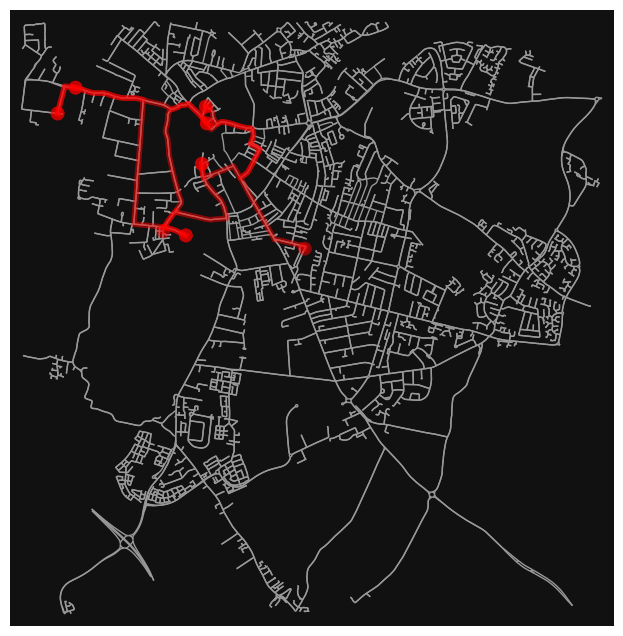

<Figure size 640x480 with 0 Axes>

In [351]:
#plotting

fig, ax = ox.plot_graph_routes(graph, routes2,route_linewidth=6, node_size=0)


## 5. Comparative analysis of check-in frequencies and network centrality

### 5.1. Calculate closeness centrality

In [261]:
#define the adress in Cambridge and create a network graph with driving parameter

G=ox.graph_from_address('Cambridge, UK',dist=6000,network_type='drive')

#create the digraph using graph

DG = ox.get_digraph(G)

In [ ]:
#calculate the closeness centrality

edge_cc = nx.closeness_centrality(nx.line_graph(DG))


In [263]:
# set or inscribe the centrality measure of each node as an edge attribute of the graph network object
nx.set_edge_attributes(DG,edge_cc,'cc')
G1 = nx.MultiGraph(DG)

In [264]:
# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G1,nodes=False,fill_edge_geometry=True)

# set crs to 277000
gdf_edges = gdf_edges.to_crs(epsg=27700)


### 5.2. Mapping the closeness centrality

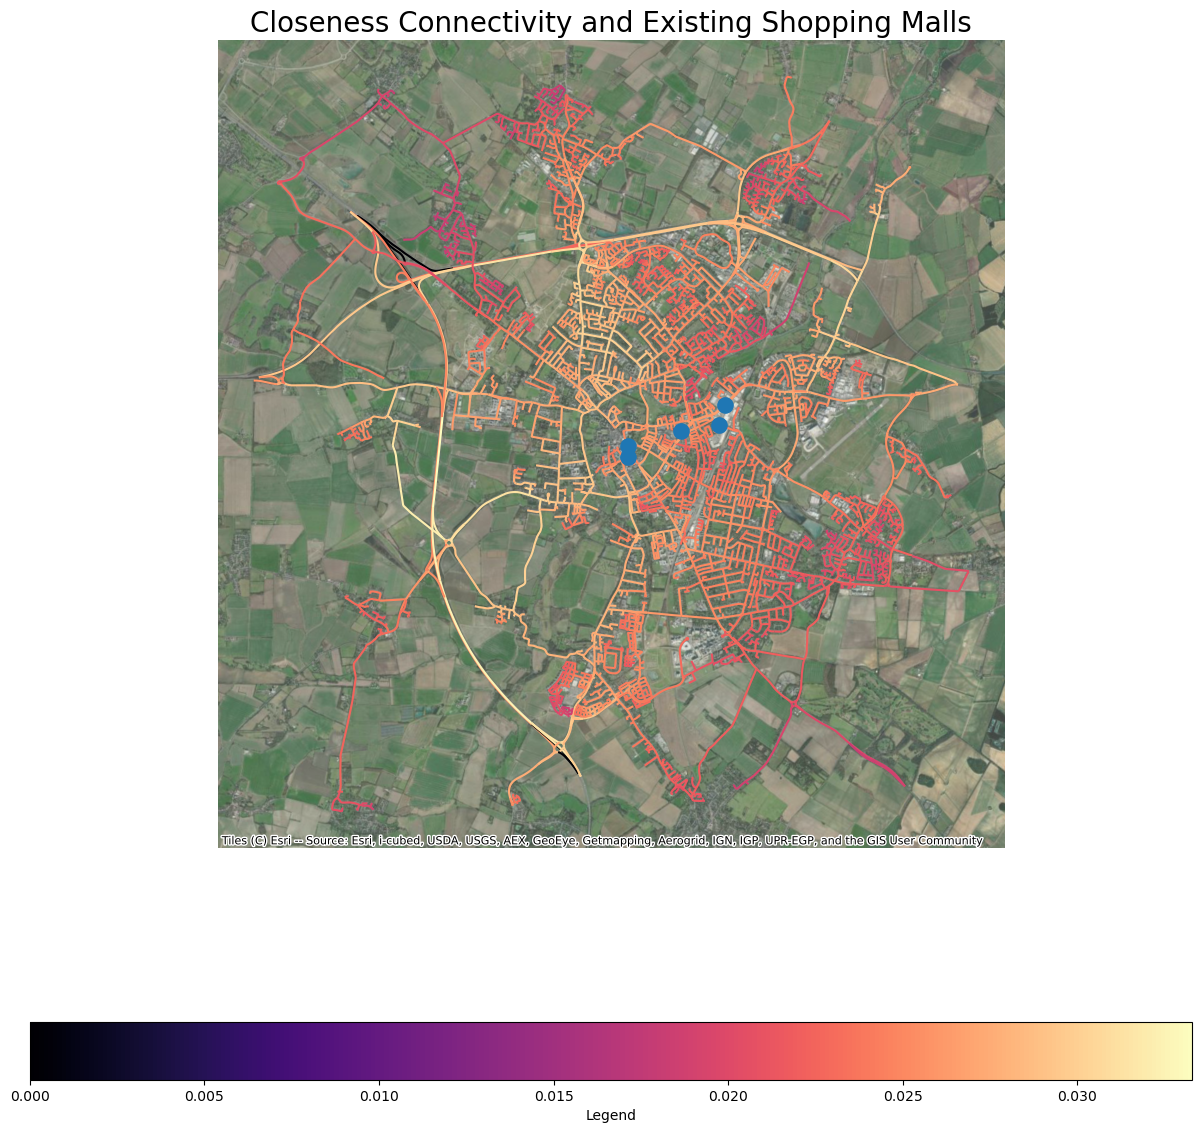

In [384]:
# map the closeness centrality

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')

#plot existing malls

malls.plot(ax=ax,marker='o',markersize=120,legend=True,zorder=2)

#plot connectivity

gdf_edges.plot(ax=ax,column='cc',cmap='magma',legend=True, legend_kwds={'label': "Legend", 'orientation': "horizontal"},zorder=1)

#basemap


ctx.add_basemap(ax,crs=gdf_edges.crs,source=ctx.providers.Esri.WorldImagery,alpha = 0.75)

# this sets the title
ax.set_title("Closeness Connectivity and Existing Shopping Malls",fontsize= 20)


# this removes the axis
ax.set_axis_off()